Here, I am using groq API to use Llama 3.3 70B Model. You can generate API key from https://groq.com/ and start using a list of Models available based on token limits.
Installing required package

In [1]:
pip install groq

Note: you may need to restart the kernel to use updated packages.


Installing required package for Langchain. This will be important for maintain conversation history and buffer moving forward

In [2]:
pip install langchain

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install langchain_community

Note: you may need to restart the kernel to use updated packages.


This is the high level flow of what we are trying to acheive. The first step is loading the document (it can be any file PDF, JSON, Word, CSV etc.) or a URL link or website. There are different types of loader that we can use based on requirement. The objective of the document loader is to load the document from various sources and convert them into Document objects.

Note: There will be case where we need to pre processing of data before spliiting the data into chunks.

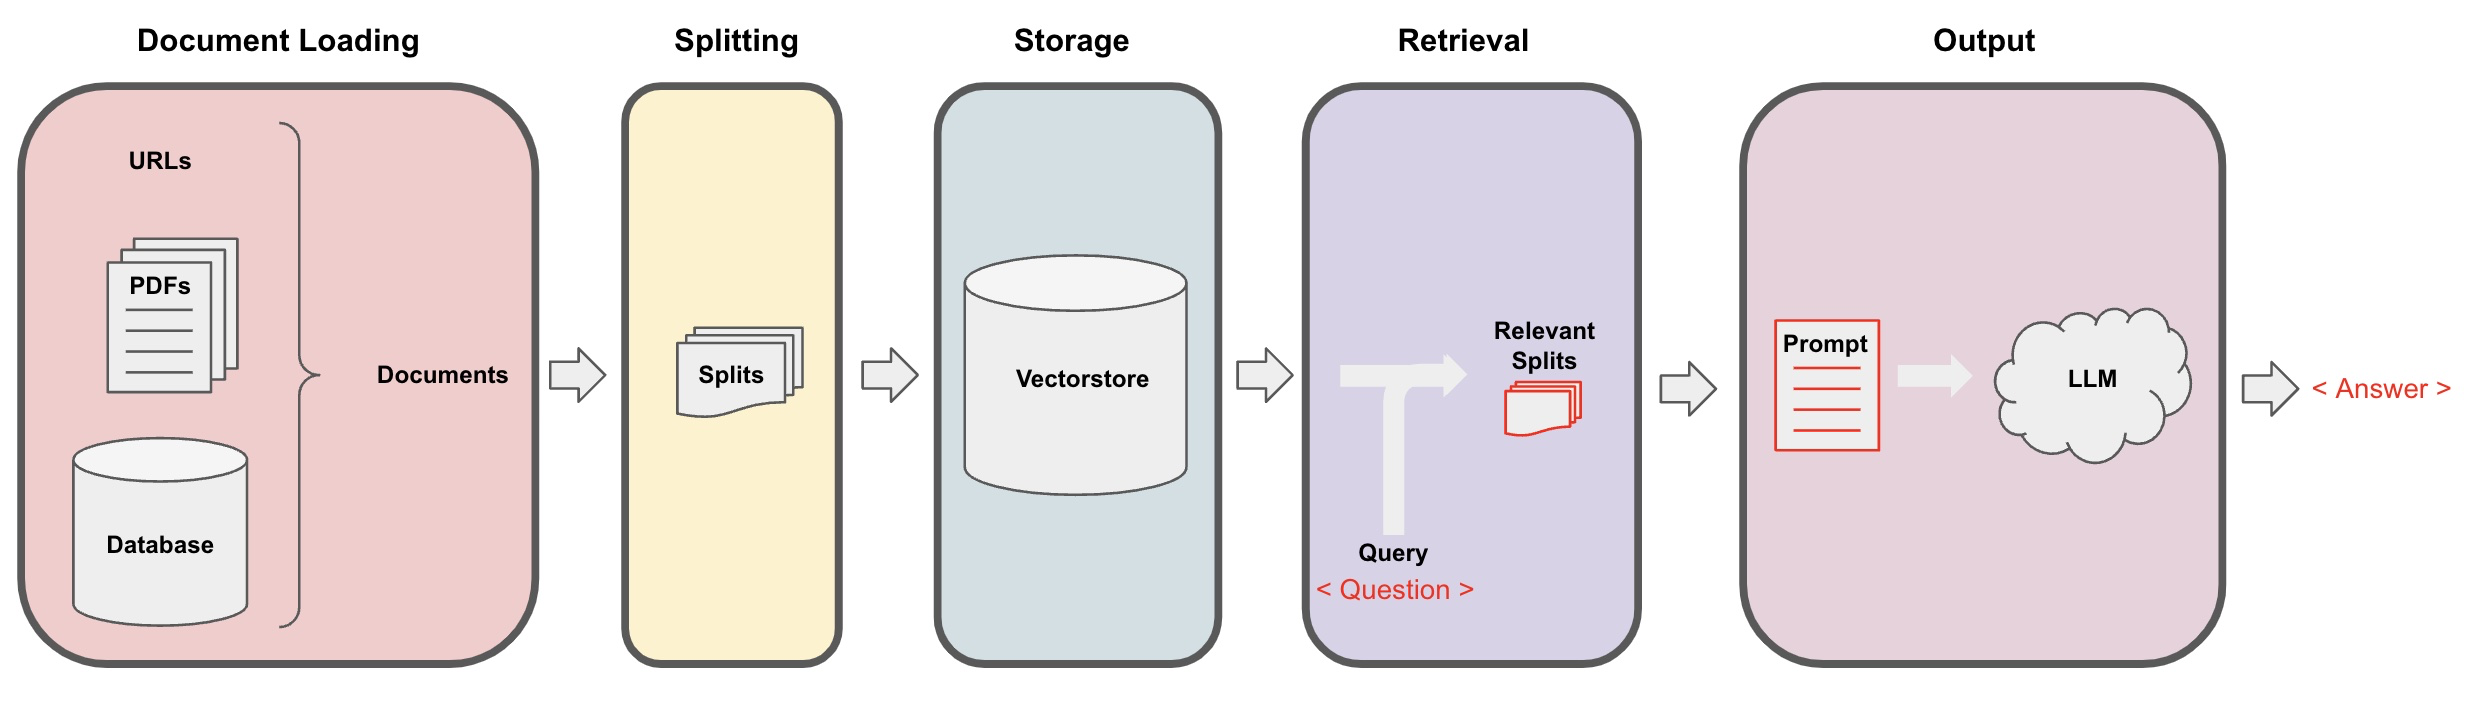

In [10]:
pip install pypdf

Note: you may need to restart the kernel to use updated packages.


As in this use case, we are trying to converse with our PDF file so we'll be using PyPDFLoader loader to load the PDF file.

In [1]:
from langchain.document_loaders import PyPDFLoader

In [2]:
loader = PyPDFLoader("/Users/chaitanyakrishna/langchain/.idea/Quiz8.pdf")
pages = loader.load()

After loading the document we now need to split the data into small chunks. Here we are intiating 2 params chunk size and chunk overlap, as the name suggest, chunk size defines how much should be the size of each chunk when we split the data from PDF file and chunk overlap is basically to maintain the contexts between two chunks.Typically, an overlap of 10-20% of the chunk size is a good starting point. Trade-offs: More overlap means better context preservation but can lead to redundancy and increased computational load. Find a balance based on your specific application needs.

In [3]:
pages

[Document(metadata={'producer': 'pdfTeX-1.40.26', 'creator': 'LaTeX with hyperref', 'creationdate': '2025-03-28T02:19:12+00:00', 'author': '', 'keywords': '', 'moddate': '2025-03-28T02:19:12+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) kpathsea version 6.4.0', 'subject': '', 'title': '', 'trapped': '/False', 'source': '/Users/chaitanyakrishna/langchain/.idea/Quiz8.pdf', 'total_pages': 3, 'page': 0, 'page_label': '1'}, page_content='Quiz - Solution\nB657 Discussion Section\nAbhay Singh\n1. As the name suggests generative models for image generation, these are computer programs that learn\nhow to generate new images.\nFor better analogy we can take example of DALL-E used by GPT for image generation, the core\nidea behind the image generation is the same i.e. the model (GAN) learns from the data\nduring training, and it can generate new images from scratch.\nHow does GAN works?\nGenerative Adversarial Nets contains two components Generator an

In [4]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

In [5]:
chunk_size =1000
chunk_overlap = 500

In [6]:
page=pages[0]

In [9]:
len(pages)

3

There are number of Text splitters in Langchain. You can explore this based on use case https://python.langchain.com/v0.1/docs/modules/data_connection/document_transformers/

Also, you can see I've manually defined separators,

1. \n\n is double line
2. \n is single line
3. " " is space
4. ?<=\. is for precedence for end of line.

By default we already have this in place, but just in case if you want to play around you can do it like this.

In [42]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separators=["\n\n", "\n", "(?<=\. )", " ", ""]
)

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/var/folders/7t/h0sy_nqn58d5dlfktth_b5_h0000gn/T/ipykernel_64159/2643490901.py:4: SyntaxWarning: invalid escape sequence '\.'
  separators=["\n\n", "\n", "(?<=\. )", " ", ""]


In [43]:
splits = r_splitter.split_documents(pages)

In [12]:
len(splits)

9

In [13]:
pip install faiss-cpu

Note: you may need to restart the kernel to use updated packages.


Till now, we have loaded the documents, splitted the documents into chunks. Now, we will be indexing the chunks to form embeddings and storing the embeddings into vector store. Here, I am using BERT model for text embeddings.

In [16]:
from sentence_transformers import SentenceTransformer
#import faiss
import numpy as np
model = SentenceTransformer("sentence-transformers/bert-base-nli-mean-tokens")  # A BERT-based model

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [15]:
pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 MB 19.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 17.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 15.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2
Note: you may need to restart the kernel to use updated packages.


In [8]:
sentence1 = "i like dogs and weather is good"
sentence2 = "i like canines"
sentence3 = "the weather is ugly outside"

In [9]:
embedding1 = model.encode(sentence1)
embedding2 = model.encode(sentence2)
embedding3 = model.encode(sentence3)

NameError: name 'model' is not defined

In [19]:
import numpy as np

In [23]:
np.dot(embedding1, embedding3)

81.661194

In [44]:
from sentence_transformers import SentenceTransformer

# Load a BERT-based embedding model
model = SentenceTransformer("sentence-transformers/bert-base-nli-mean-tokens")



embedded_splits = []
for doc in splits:
    text = doc.page_content  # Extract the text content
    metadata = doc.metadata  # Extract the metadata

    # Generate embedding for the text
    embedding = model.encode(text)

    # Store the embedding and metadata
    embedded_splits.append({
        "embedding": embedding,
        "metadata": metadata
    })

In [25]:
embedded_splits

[{'embedding': array([-6.90428615e-02,  3.02160472e-01,  8.17923129e-01,  4.85692859e-01,
          2.22258061e-01, -6.51880682e-01, -1.77038722e-02, -2.75723279e-01,
          3.82908642e-01, -5.65088093e-01,  7.02391118e-02,  9.96837854e-01,
          3.93860281e-01,  2.44983798e-03, -1.21914101e+00, -1.34503424e-01,
         -4.07435931e-02, -9.71821308e-01, -2.40016486e-02, -2.64771096e-02,
         -3.58584821e-01, -3.20355386e-01, -3.27706575e-01,  7.58314133e-01,
          2.05442578e-01,  1.08432043e+00,  2.40169451e-01,  4.19361711e-01,
         -7.63819993e-01,  1.94439068e-01, -5.07061958e-01, -3.16518039e-01,
          2.26894602e-01, -5.74471593e-01,  9.80743840e-02,  9.11207080e-01,
          4.74941909e-01,  1.88238800e-01,  5.73039532e-01,  1.45359397e-01,
         -4.29108590e-01, -5.88461943e-02,  6.16129115e-02, -1.59375265e-01,
         -1.32042015e+00, -5.43590263e-02, -4.67516512e-01,  5.06479144e-01,
          1.62813425e-01, -8.60001087e-01, -6.63741410e-01,  7.

After creating embeddings we need to store the embeddings in vector db for retrieval. We'll be using Chroma to store our embeddings into vector store.

In [26]:
pip install chromadb

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 14.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 18.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 16.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.1 MB/s eta 0:00:00
  Created wheel for pypika: filename=pypika-0.48.9-py2.py3-none-any.whl size=53803 sha256=cbb80a0f02691ddecb912fef54e36d8dbb42e9b2a397caa6267d61d242f6914e
  Stored in directory: /Users/chaitanyakrishna/Library/Caches/pip/wheels/d5/3d/69/8d68d249cd3de2584f226e27fd431d6344f7d70fd856ebd01b
Successfully built pypika
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully

In [27]:
from langchain.vectorstores import Chroma

In [46]:
persist_directory = 'docs/chroma/ML'

In [45]:
rm -rf ./docs/chroma

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [47]:
from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings

# Load your BERT model for embedding
embedding_function = HuggingFaceEmbeddings(model_name="sentence-transformers/bert-base-nli-mean-tokens")

# Persist directory for storing vector data
persist_directory = "docs/chroma/ML/"

# Use Chroma.from_documents to add documents to the vector store
vectordb = Chroma.from_documents(
    documents=splits,  # List of Document objects
    embedding=embedding_function,  # Pass the embedding function, not the precomputed embeddings
    persist_directory=persist_directory  # Directory for persistence
)

InternalError: Query error: Database error: error returned from database: (code: 1032) attempt to write a readonly database

In [ ]:
print(vectordb._collection.count())

In [ ]:
question = "Is there any mention of MATLAB?"

# RETRIEVAL

Retrieval is one of the important step in this process. There are different retrieval methods by which we can retrieve the data from Vector store.
https://python.langchain.com/v0.1/docs/modules/data_connection/

Here, we will be using similarity search!

We give the query and it gives relevant splits from the vector store!. You can try different methods and check which best fits your case.

In [ ]:
docs = vectordb.similarity_search(question,k=5)

In [ ]:
len(docs)

In [ ]:
docs[3].page_content

Saving it for later use!

In [ ]:
vectordb.persist()

Model Llama 3.3 70B

In [ ]:
question = "What are major topics for this class?"
docs = vectordb.similarity_search(question,k=10)
len(docs)

#THE LAST DANCE

Till now, we have

Loaded Doc -> Split Data into Chunks -> Create Embeddings -> Store in Vector DB -> Retrieval

Now, we'll be using LLama 3.3 70B model and provide the model with prompt and it will answer the questions based on the document we provided.

In [30]:
from langchain.chains import RetrievalQA

In [31]:
from groq import Groq
from datetime import datetime

# Initialize Groq client
client = Groq(api_key="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")

# Today's date
today_date = datetime.now().strftime("%d %B %Y")

# Retrieved context
query = "Is there mention of decoder?"
retriever = vectordb.as_retriever(search_kwargs={"k": 10})
relevant_docs = retriever.get_relevant_documents(query)
context = " ".join([doc.page_content for doc in relevant_docs])

# Construct messages
messages = [
    {
        "role": "system",
        "content": f"Cutting Knowledge Date: December 2023\nToday Date: {today_date}\nYou are a helpful assistant. Use the provided context to answer questions accurately."
    },
    {
        "role": "user",
        "content": f"Context:\n{context}\n\nQuestion: {query}"
    }
]

# Call the LLaMA model
response = client.chat.completions.create(
    model="llama-3.3-70b-versatile",
    messages=messages,
    max_tokens=1024,
    temperature=0
)

model_response = response.choices[0].message.content
print(f"Answer: {model_response}")


/var/folders/7t/h0sy_nqn58d5dlfktth_b5_h0000gn/T/ipykernel_64159/1212373423.py:13: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  relevant_docs = retriever.get_relevant_documents(query)


Answer: Yes, there are multiple mentions of a decoder in the provided context. 

A decoder is mentioned as part of a Variational Autoencoder (VAE) that transforms points from the latent space into images. It is also mentioned that a well-trained decoder generates outputs that closely resemble the original data.

Additionally, the context mentions that the decoder receives the compact representation given by the encoder and tries to recreate the original input. 

There are also specific sections dedicated to explaining the role of the decoder in VAEs, such as section 3 and section 6 (A) Encoder, which also talks about the decoder.


We will be using Langchain's ConversationBufferMemory and ConversationalRetrievalChain to maintain chat history!

In [32]:
from langchain.memory import ConversationBufferMemory
memory = ConversationBufferMemory(
    memory_key="chat_history",
    return_messages=True
)

/var/folders/7t/h0sy_nqn58d5dlfktth_b5_h0000gn/T/ipykernel_64159/1956280058.py:2: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(


In [37]:
pip install langchain-groq

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [38]:
from langchain.chains import ConversationalRetrievalChain
from langchain.memory import ConversationBufferMemory
from langchain.prompts import PromptTemplate
from langchain_groq import ChatGroq
import os

# Set Groq API key
os.environ["GROQ_API_KEY"] = "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"

# Initialize the ChatGroq LLM
llm = ChatGroq(
    model="llama-3.3-70b-versatile",
    temperature=0.7,
    max_tokens=2000
)

# Define the retriever (Chroma vectordb is already set up)
retriever = vectordb.as_retriever(search_kwargs={"k": 10})

# Initialize conversational memory
memory = ConversationBufferMemory(
    memory_key="chat_history",  # Key to store conversation history
    return_messages=True       # Ensures messages are returned with responses
)

# Define a custom prompt (optional)
prompt_template = PromptTemplate(
    template="""
You are a helpful assistant. Use the provided context and chat history to answer questions accurately.

Chat History:
{chat_history}

Context:
{context}

Question:
{question}

Answer:
""",
    input_variables=["chat_history", "context", "question"]
)

# Create the conversational retrieval chain
qa = ConversationalRetrievalChain.from_llm(
    llm=llm,
    retriever=retriever,
    memory=memory
)

# Example interaction
query_1 = "From the doc do we have any details on Discriminator?"
response_1 = qa({"question": query_1})
print(f"Q: {query_1}\nA: {response_1['answer']}")

/var/folders/7t/h0sy_nqn58d5dlfktth_b5_h0000gn/T/ipykernel_64159/1012103499.py:54: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response_1 = qa({"question": query_1})


Q: From the doc do we have any details on Discriminator?
A: Yes, according to the document, the Discriminator is the part of a GAN (Generative Adversarial Network) that:

* Receives both real and fake data
* Tries to correctly classify each one as real or fake
* Its goal is to tell apart real examples from the training data and fake examples made by the Generator
* It competes with the Generator in a minimax game-like setup, where it tries to maximize its ability to guess real from fake, while the Generator tries to minimize this ability by getting better at generating realistic images.

In other words, the Discriminator's job is to distinguish between real and fake data, and it gets better at doing so as it competes with the Generator during the training process.


In [39]:
query_2 = "Can you tell something about VAEs?"
response_2 = qa({"question": query_2})
print(f"Q: {query_2}\nA: {response_2['answer']}")

Q: Can you tell something about VAEs?
A: Variational Autoencoders (VAEs) are a type of generative model in machine learning. They consist of two main components: an encoder and a decoder. 

The encoder takes input data and compresses it into a smaller, meaningful representation called latent space. This latent space aims to capture the most important features of the input data. The encoder learns to represent the input data as a short vector that summarizes the key characteristics of the data, such as style, color, or shape.

The decoder, on the other hand, takes this compressed representation (latent space) and attempts to recreate the original input data. The decoder transforms points from the latent space into images, and a well-trained decoder generates outputs that closely resemble the original data.

VAEs are trained using backpropagation, similar to regular neural networks, but with an additional term called KL divergence. This term ensures that the encoded summary stays close t

In [48]:
query_2 = "How many True and how many False answers are there in the document?"
response_2 = qa({"question": query_2})
print(f"Q: {query_2}\nA: {response_2['answer']}")

Q: How many True and how many False answers are there in the document?
A: According to the document, there are:

* 2 correct answers (marked as "(i) True" and "(iii) True")
* 1 incorrect answer (marked as "(ii) False") 

Note that there is another "(iv) False" but it is not accompanied by any statement to verify its correctness.


In [49]:
query_2 = "Can you summarize in short what all things are mentioned in the document?"
response_2 = qa({"question": query_2})
print(f"Q: {query_2}\nA: {response_2['answer']}")

Q: Can you summarize in short what all things are mentioned in the document?
A: The document mentions the following topics and information:

1. **Generative Models for Image Generation**: Introduction to generative models, specifically Generative Adversarial Networks (GANs) and Variational Autoencoders (VAEs), used for image generation.
2. **GANs (Generative Adversarial Networks)**: Explanation of how GANs work, including the two components: Generator and Discriminator, and their roles in generating and evaluating images.
3. **VAEs (Variational Autoencoders)**: Explanation of how VAEs work, including the encoder and decoder components, and their roles in compressing and reconstructing images.
4. **Encoder and Decoder**: Definitions and explanations of the encoder and decoder components in VAEs, including their roles in compressing and reconstructing images.
5. **Dimensionality Reduction**: Mention of Principal Component Analysis (PCA) as a technique for reducing dimensionality, and its